# Image Clustering for Cancer Cell Experiment

In [33]:
from numpy import array
import cv2
from os import listdir
from os.path import join

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

## Loading an Preprocessing of Images

All images are loaded by `cv2`, resized to `(224, 224, 3)`, preprocessed to match the requirements of `VGG16` and then fed through the non-top part of the model (including `Flatten()`) to get an representative image vector. These vectors can than be clustered.

In [34]:
width = 224
height = 224
IMAGE_DIM = (width, height)

In [35]:
def setup_model():
    vgg = VGG16(
        input_shape=(width, height, 3),
        weights="imagenet",
        include_top=False
    )

    for layer in vgg.layers:
        layer.trainable = False

    model = Sequential()
    model.add(vgg)
    model.add(Flatten())
    return model


def load_image(image_path):
    return preprocess_input(
        cv2.resize(
            cv2.imread(image_path, 1),
            IMAGE_DIM,
            interpolation=cv2.INTER_AREA
        )
    )

def load_image_folder(folder_path):
    images = []
    for image_path in listdir(folder_path):
        images.append(load_image(join(folder_path,image_path)))

    return array(images)

In [36]:
images = load_image_folder("input_data/Images_Cropped/a")
model = setup_model()

In [37]:
flat_images = model.predict(images)

1/2 ━━━━━━━━━━━━━━━━━━━━ 5s 6s/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A1A453D820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step


## Clustering images

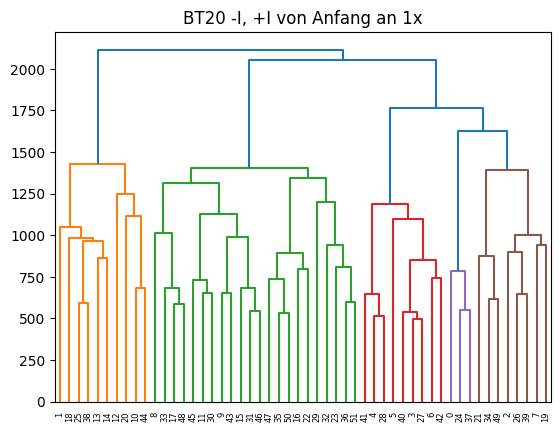

In [39]:
Z = hierarchy.linkage(flat_images, method="ward")
hierarchy.dendrogram(Z)
plt.title("BT20 -I, +I von Anfang an 1x")
plt.show()